#### 1. Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### 2. Чтение набора данных

In [ ]:

url = "https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/netflix.csv"
df = pd.read_csv(url)
df.head()


,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,20152022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0
4,Cyberpunk: Edgerunners,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0


#### 3. Первые 7 строк набора данных

In [ ]:
df.head(7)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,20152022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0
4,Cyberpunk: Edgerunners,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0
5,The Sandman,2022.0,TV-MA,45.0,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358.0
6,Rick and Morty,2013.0,TV-MA,23.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160.0


#### 4. Последние 5 строк набора данных

In [ ]:
df.tail(5)

,title,year,certificate,duration,genre,rating,description,stars,votes
9952,The Imperfects,2022.0,TV-MA,45.0,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",3130.0
9953,The Walking Dead,20102022.0,TV-MA,44.0,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067.0
9954,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199898.0
9955,Supernatural,20052020.0,TV-14,44.0,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...",439601.0
9956,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9786.0


#### 5. Поля набора данных

In [ ]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

#### 6. Размер набора данных (количество полей и строк)

In [ ]:
df.shape

(9957, 9)

#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [ ]:
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')[0]
df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)')[0]
df['votes'] = df['votes'].astype(str).str.replace(',', '', regex=False)
df['rating'] = df['rating'].astype(str).str.replace(',', '.', regex=False)

patterns = {
    'year': r'(\d{4})',
    'duration': r'(\d+)',
    'votes': r'([\d,]+)',
    'rating': r'([\d.,]+)'}

for col, pattern in patterns.items():
    if col in df.columns:
        df[col] = df[col].astype(str).str.extract(pattern, expand=False)
        df[col] = df[col].str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['year', 'duration', 'votes', 'rating'])

fields = pd.DataFrame({
    'Поле': df.columns,
    'Тип данных': df.dtypes.astype(str),
    'Назначение': [
        'Название фильма/шоу',
        'Год выпуска',
        'Официальный рейтинг',
        'Продолжительность',
        'Жанр/описание категории',
        'Рейтинг IMDB',
        'Описание сюжета',
        'Список актёров',
        'Количество голосов пользователей'
    ][:len(df.columns)]
})
fields

,Поле,Тип данных,Назначение
title,title,object,Название фильма/шоу
year,year,float64,Год выпуска
certificate,certificate,object,Официальный рейтинг
duration,duration,float64,Продолжительность
genre,genre,object,Жанр/описание категории
rating,rating,float64,Рейтинг IMDB
description,description,object,Описание сюжета
stars,stars,object,Список актёров
votes,votes,float64,Количество голосов пользователей


#### 8. Информация о наборе данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7680 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7680 non-null   object 
 1   year         7680 non-null   float64
 2   certificate  5754 non-null   object 
 3   duration     7680 non-null   float64
 4   genre        7673 non-null   object 
 5   rating       7680 non-null   float64
 6   description  7680 non-null   object 
 7   stars        7680 non-null   object 
 8   votes        7680 non-null   float64
dtypes: float64(4), object(5)
memory usage: 600.0+ KB


#### 9. Проверка наличия пропусков в данных

In [ ]:
df.isnull().sum()

,0
title,0
year,0
certificate,1926
duration,0
genre,7
rating,0
description,0
stars,0
votes,0


#### 10. Если вы обнаружили пропуски в данных, то удалите их

In [ ]:
df = df.dropna()

#### 11. Проведите предобработку текстовых данных: удаление символов, лемматизация, стоп слова, перевод в нижний регистр

In [ ]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z ]', '', text)
        text = text.lower()
        words = text.split()
        words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
        return ' '.join(words)
    return text
df['title_clean'] = df['title'].apply(clean_text)
df.head(3)


,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,cobra kai
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,crown
2,Better Call Saul,2015.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,better call saul


#### 12. Фильтрация. Выберите все строки таблицы, для которых значение поля votes больше 922040.0

In [ ]:
df[df['votes'] > 922040.0]

,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean
7,Breaking Bad,2008.0,TV-MA,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831340.0,breaking bad
10,Stranger Things,2016.0,TV-14,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149889.0,stranger thing
12,The Walking Dead,2010.0,TV-MA,44.0,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970060.0,walking dead
20,The Lord of the Rings: The Fellowship of the Ring,2001.0,PG-13,178.0,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055.0,lord ring fellowship ring
26,Friends,1994.0,TV-14,22.0,"Comedy, Romance",8.9,Follows the personal and professional lives of...,"['Jennifer Aniston, ', 'Courteney Cox, ', 'Lis...",979424.0,friend
57,The Lord of the Rings: The Return of the King,2003.0,PG-13,201.0,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,lord ring return king
78,The Lord of the Rings: The Two Towers,2002.0,PG-13,179.0,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,lord ring two tower
96,Titanic,1997.0,PG-13,194.0,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...",1158746.0,titanic
113,Jurassic Park,1993.0,PG-13,127.0,"Action, Adventure, Sci-Fi",8.2,A pragmatic paleontologist touring an almost c...,"['Steven Spielberg', '| ', ' Stars:', 'Sam ...",978402.0,jurassic park
153,Gladiator,2000.0,R,155.0,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,gladiator


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля stars равно []

In [ ]:
df[df['stars'] == '[]']

,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean
2697,The Pharmacist,2020.0,TV-MA,217.0,"Documentary, Crime",7.7,"In 1999, after losing his son in a drug-relate...",[],7440.0,pharmacist
2953,Chef's Table: BBQ,2020.0,TV-14,40.0,Documentary,7.8,The critically-acclaimed series returns for it...,[],1051.0,chef table bbq
3801,Designing Miami,2022.0,TV-MA,40.0,Reality-TV,6.3,It showcases two designers from Miami who are ...,[],33.0,designing miami
3903,Oggy and the Cockroaches: Next Generation,2022.0,TV-Y7,7.0,"Animation, Short, Adventure",6.1,Join cool cat Oggy and playful elephant Piya a...,[],42.0,oggy cockroach next generation
4098,The Great Robbery of Brazil's Central Bank,2022.0,TV-MA,60.0,"Documentary, Crime",6.4,"In 2005, thieves tunnel into a Fortaleza, Braz...",[],572.0,great robbery brazil central bank
4115,Mighty Little Bheem,2019.0,TV-Y,6.0,"Animation, Short, Adventure",6.4,An innocent toddler's boundless curiosity - an...,[],260.0,mighty little bheem
4145,Zig & Sharko,2010.0,TV-Y,7.0,"Animation, Comedy, Family",6.8,"Zig, a famished hyena comes up with the crazie...",[],695.0,zig sharko
4290,Iron Chef: Mexico,2022.0,TV-MA,50.0,"Game-Show, Reality-TV",8.7,Rising talents participate in this cooking com...,[],8.0,iron chef mexico
4362,Girls Incarcerated: Young and Locked Up,2018.0,TV-MA,45.0,"Documentary, Reality-TV, Talk-Show",7.2,A documentary show about troubled girls who ar...,[],1116.0,girl incarcerated young locked
4531,Byron Baes,2022.0,TV-MA,40.0,Reality-TV,2.7,Exploring social media star culture in a place...,[],507.0,byron baes


#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля title равно Top Gear и значение поля certificate равно TV-MA

In [ ]:
df[(df['title'] == 'Top Gear') & (df['certificate'] == 'TV-MA')]

,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean
8121,Top Gear,2002.0,TV-MA,60.0,"Adventure, Comedy, Reality-TV",7.8,Richard tests the new Ascari KZ1. The boys tra...,"['Brian Klein, ', 'James Bryce, ', 'Phil Churc...",209.0,top gear


#### 15. Получите все уникальные значения поля  certificate и подсчитайте частоту появления каждого их них

In [ ]:
df['certificate'].value_counts()

,count
certificate,
TV-MA,2197
TV-14,1081
R,466
TV-PG,464
Not Rated,458
PG-13,276
TV-Y7,266
PG,154
TV-G,114


#### 16. Выполните группировку набора данных одновременно по полям genre и certificate. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [ ]:
df.groupby(['genre','certificate'])['duration'].agg(['min','max','median'])

min    max  median
genre              certificate                      
Action             Not Rated     90.0  146.0   114.0
                   PG-13         85.0   85.0    85.0
                   R             90.0  110.0    91.0
                   TV-MA         88.0   88.0    88.0
Action, Adventure  PG-13        110.0  110.0   110.0
...                               ...    ...     ...
Thriller           TV-14         80.0  105.0    88.0
                   TV-MA         60.0  460.0    99.0
Western            Approved      81.0   95.0    89.5
                   Passed        84.0   84.0    84.0
Western, Adventure Approved      89.0   89.0    89.0

[1207 rows x 3 columns]

#### 17. Постройте поле корреляции (тепловая карта) для числовых полей

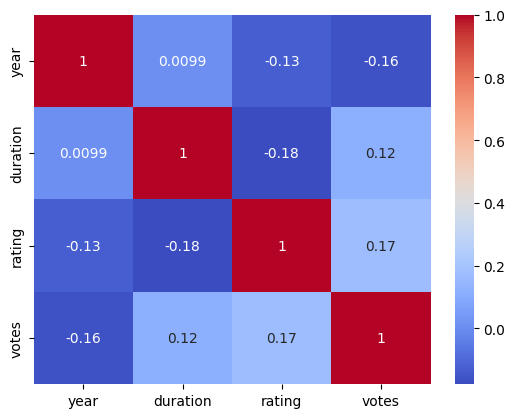

In [ ]:

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


#### 18. Постройте гистограмму по полю duration

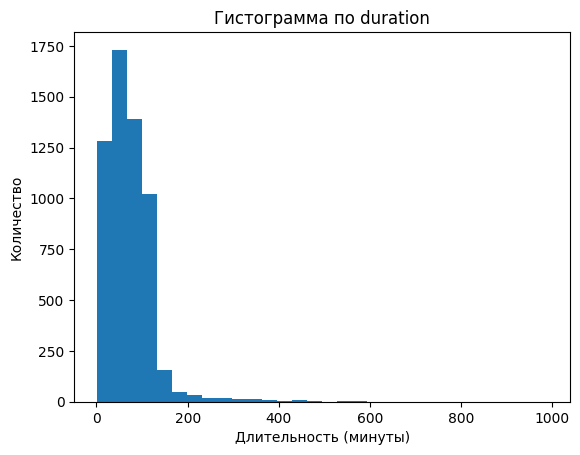

In [ ]:

plt.hist(df['duration'], bins=30)
plt.title('Гистограмма по duration')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Количество')
plt.show()


#### 19. Постройте точечную диаграмму для полей votes и duration

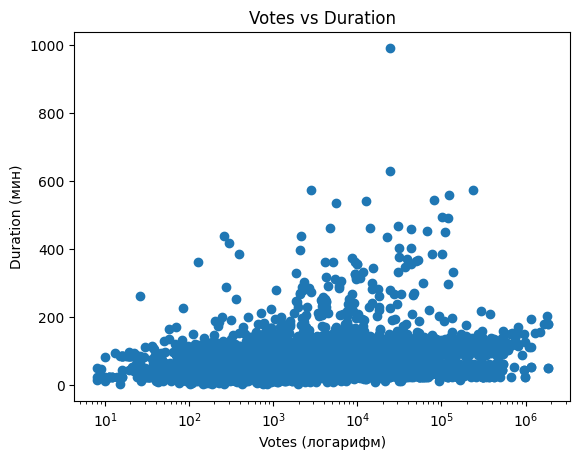

In [ ]:
df = df.dropna(subset=['votes', 'duration'])
plt.scatter(df['votes'], df['duration'])
plt.xscale('log')
plt.xlabel('Votes (логарифм)')
plt.ylabel('Duration (мин)')
plt.title('Votes vs Duration')
plt.show()

#### 20. Постройте диаграмму ящик с усами поля votes

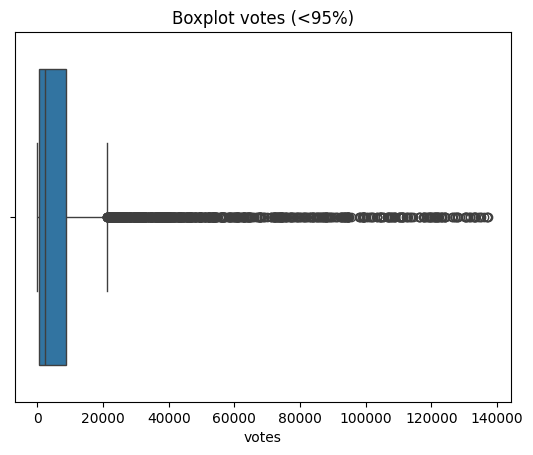

In [ ]:
sns.boxplot(x=df['votes'][df['votes'] < df['votes'].quantile(0.95)])
plt.title('Boxplot votes (<95%)')
plt.show()

#### 21. Постройте матрицу диаграммы рассеяния

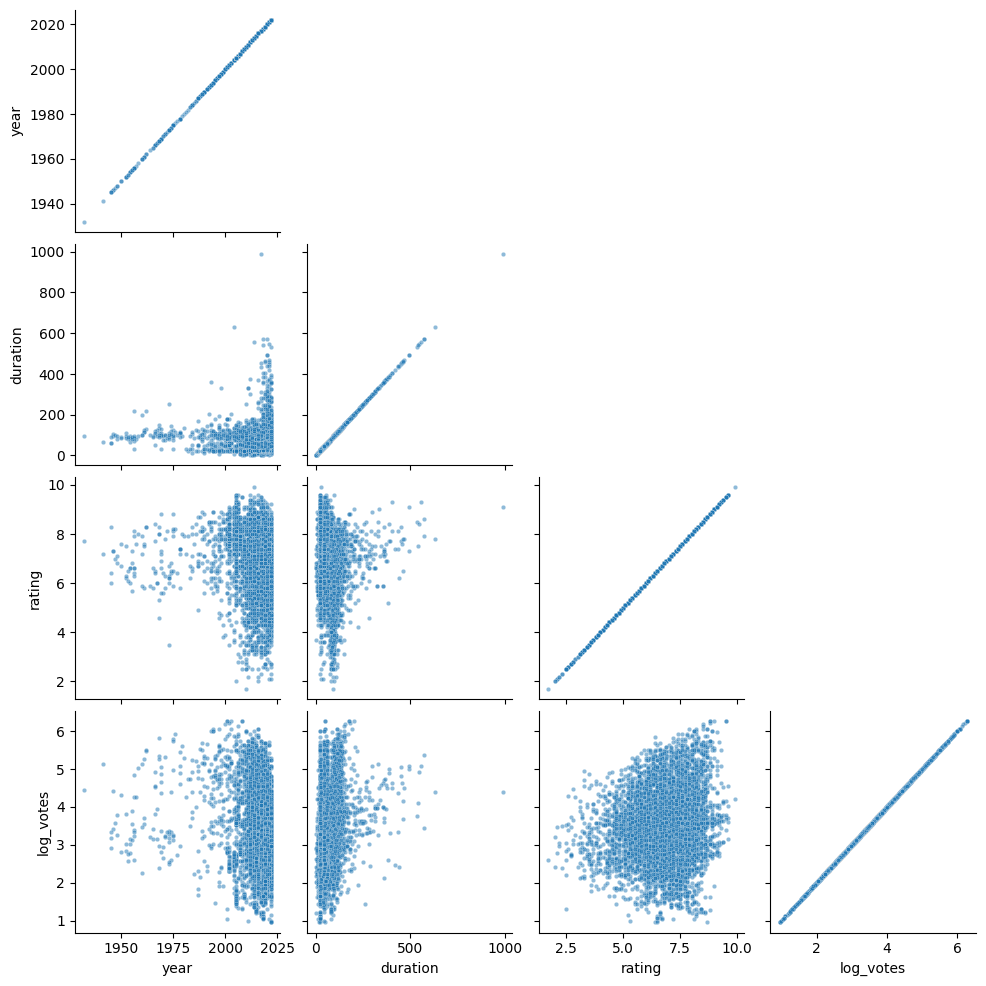

In [ ]:
df['log_votes'] = np.log10(df['votes'] + 1)
sns.pairplot(df[['year', 'duration', 'rating', 'log_votes']], diag_kind=None, corner=True, plot_kws={'s': 10, 'alpha': 0.5})
plt.show()


#### 22. Удалите поля, которые будут неинформативны для построения модели машинного обучения. Оставьте такое количество полей, которое будет для вас удобным при построении модели машинного обучения

In [ ]:

df_ml = df.drop(columns=['title','stars','title_clean'])
df_ml.head()


,year,certificate,duration,genre,rating,description,votes,log_votes
0,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,177031.0,5.248052
1,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,199885.0,5.300782
2,2015.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,501384.0,5.700171
3,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,9773.0,3.990072
4,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,15413.0,4.187915


#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [ ]:

cat_cols = df_ml.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
df_ml.head()


,year,certificate,duration,genre,rating,description,votes,log_votes
0,2018.0,11,30.0,21,8.5,2267,177031.0,5.248052
1,2016.0,13,58.0,168,8.7,2646,199885.0,5.300782
2,2015.0,13,46.0,238,8.9,4868,501384.0,5.700171
3,2022.0,13,356.0,360,5.9,5402,9773.0,3.990072
4,2022.0,13,24.0,112,8.6,112,15413.0,4.187915


#### 24. Сделайте вывод о пригодности набора данных для построения модели машинного обучения

Набор данных после очистки и кодирования пригоден для построения модели машинного обучения.
Все категориальные признаки преобразованы в числовые.
Пропуски удалены, числовые значения приведены к корректному типу.
Объем данных достаточен для анализа и обучения моделей.



#### 25. Разделить выборку на признаки (Х) и результат (Y)

In [ ]:
df_ml['rating_class'] = pd.cut(
    df_ml['rating'],
    bins=[0, 5, 7, 8.5, 10],
    labels=['низкий', 'средний', 'высокий', 'топ']
)

X = df_ml.drop(columns=['rating', 'rating_class'])
y = df_ml['rating_class']

y.value_counts()


,count
rating_class,
средний,2574
высокий,2417
низкий,482
топ,281


#### 26. Разделить на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)



Размер обучающей выборки: (4603, 7)
Размер тестовой выборки: (1151, 7)


#### 27. Сформировать модель машинного обучения QDA

In [ ]:
model = QuadraticDiscriminantAnalysis()

#### 28. Обучить модель

In [ ]:
model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

#### 29. Оценить качество модели

In [ ]:
y_pred = model.predict(X_test)
print("Пример предсказаний:", y_pred[:10])

acc = accuracy_score(y_test, y_pred)
print(f"Точность модели (Accuracy): {acc:.3f}\n")

print("Отчёт по классам:")
print(classification_report(y_test, y_pred))


Пример предсказаний: ['средний' 'низкий' 'средний' 'средний' 'низкий' 'средний' 'низкий'
 'низкий' 'высокий' 'низкий']
Точность модели (Accuracy): 0.361

Отчёт по классам:
              precision    recall  f1-score   support

     высокий       0.63      0.15      0.24       484
      низкий       0.16      0.67      0.26        96
     средний       0.43      0.53      0.48       515
         топ       0.44      0.12      0.19        56

    accuracy                           0.36      1151
   macro avg       0.42      0.37      0.29      1151
weighted avg       0.49      0.36      0.35      1151



#### 30. Выполнить предсказание для трех фраз

In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(3)

,Actual,Predicted
1962,высокий,средний
2753,средний,низкий
8201,высокий,средний


#### 31. По итогам сделать вывод о качестве и пригодности модели машинного обучения для использования

### Вывод о качестве и пригодности модели

Модель **Quadratic Discriminant Analysis (QDA)** показала низкое качество классификации рейтингов.

- **Accuracy:** 0.36 — модель правильно предсказала около 36% объектов тестовой выборки.  
- **F1-score:** варьируется от 0.18 до 0.26 в зависимости от класса.  
- Наибольшее количество ошибок наблюдается при определении классов *«высокий»* и *«топ»*, которые часто путаются со *«средним»* рейтингом.  
- Матрица ошибок показывает значительное пересечение между соседними категориями.

**Вывод:**  
Модель не обеспечивает надёжного разделения классов рейтинга.  
Использование QDA для этих данных **непригодно**, так как распределение признаков не соответствует предположениям метода (нормальность и различие ковариационных матриц).  
Для повышения точности рекомендуется использовать более устойчивые алгоритмы.

#### 32. Постройте еще одну модель машинного обучения, сравните той, что была в задании и сделайте вывод о том, какая модель лучше. (Модель 2: Random Forest)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest")
print(f"Accuracy: {acc_rf:.3f}")
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.674
              precision    recall  f1-score   support

     высокий       0.70      0.72      0.71       484
      низкий       0.54      0.21      0.30        96
     средний       0.66      0.75      0.71       515
         топ       0.64      0.32      0.43        56

    accuracy                           0.67      1151
   macro avg       0.64      0.50      0.54      1151
weighted avg       0.67      0.67      0.66      1151



### Вывод о сравнении моделей QDA и Random Forest

Модель **Quadratic Discriminant Analysis (QDA)** показала низкое качество классификации рейтингов, с точностью около **0.36**.  
Основные ошибки наблюдались между соседними классами рейтинга, что говорит о неспособности модели корректно разделить нелинейные границы между ними.

Модель **Random Forest Classifier** показала значительно лучшие результаты:
- **Accuracy:** 0.67  
- **F1-score:** от 0.30 до 0.71 по классам  
- Наиболее точно определяются категории *«высокий»* и *«средний»*, что указывает на лучшее распознавание закономерностей в данных.

**Сравнение:**  
Random Forest устойчив к шуму, не требует нормальности распределений и способен находить сложные нелинейные зависимости, в отличие от QDA.  
По всем метрикам Random Forest превосходит QDA и является **более пригодной моделью** для классификации рейтингов фильмов.
